In [1]:
#Load & Explore the Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Overview
print(df.head())
print(df.info())
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

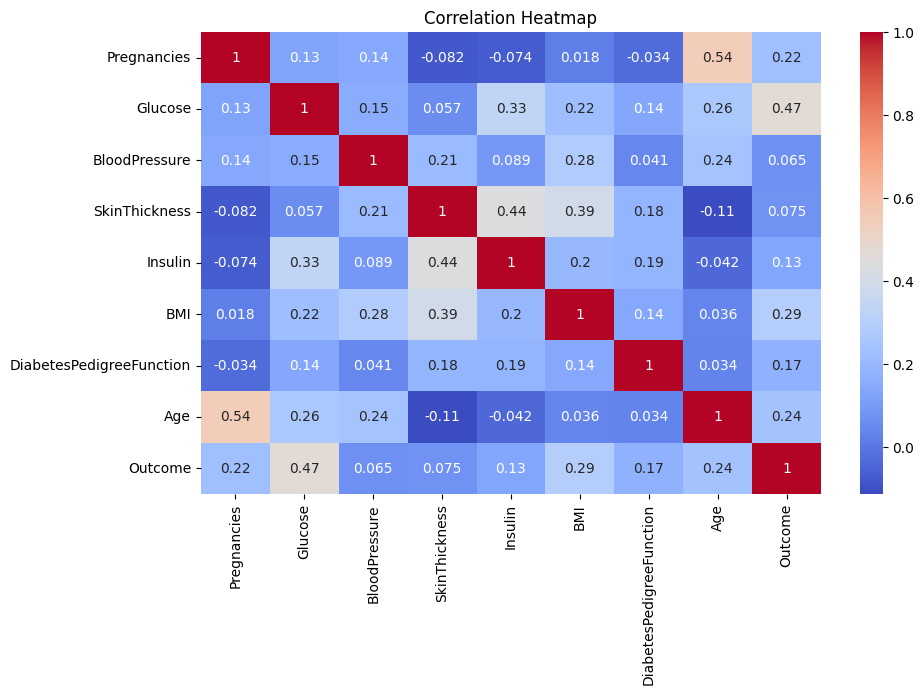

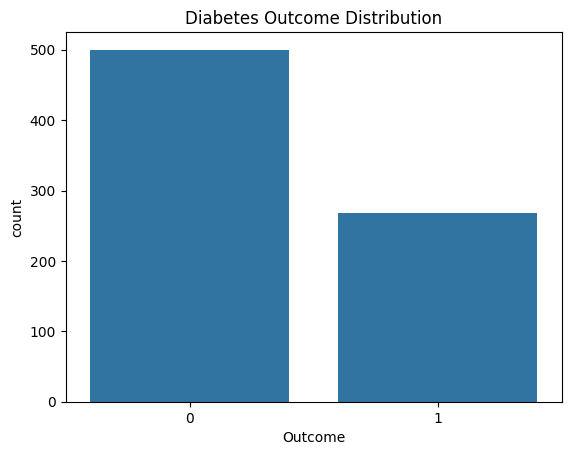

In [3]:
#Data Visualization & Interpretation
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


In [5]:
#Feature Engineering

# Replace zeroes in these features with NaN
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, pd.NA)

# Fill or drop
df.fillna(df.mean(), inplace=True)


In [6]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


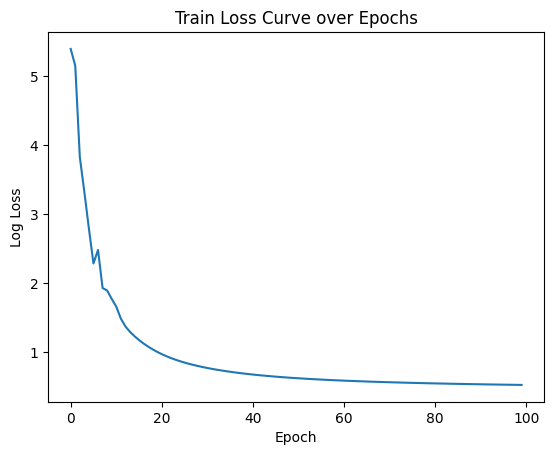

In [7]:
#Linear Regression Model + Loss Curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Using SGD for gradient descent
sgd = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', random_state=42)

loss_values = []

for i in range(1, 101):
    sgd.partial_fit(X_train_scaled, y_train, classes=[0,1])
    y_train_prob = sgd.predict_proba(X_train_scaled)
    loss = log_loss(y_train, y_train_prob)
    loss_values.append(loss)

# Plot Loss Curve
plt.plot(loss_values)
plt.title("Train Loss Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.show()


In [7]:
# Model Comparisons

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.7532
Decision Tree: Accuracy = 0.7078
Random Forest: Accuracy = 0.7468


In [8]:
# Save Best Model

import joblib

best_model = models["Random Forest"]
joblib.dump(best_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [16]:
# Prediction Function Script (For Task 2)

def predict_diabetes(input_data):
    model = joblib.load("diabetes_model.pkl")
    scaler = joblib.load("scaler.pkl")
    input_scaled = scaler.transform([input_data])
    return model.predict(input_scaled)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib



In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

losses = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    loss = mean_squared_error(y_test, preds)
    losses[name] = loss
    print(f"{name} MSE: {loss}")


Linear Regression MSE: 0.1643241356748924
Decision Tree MSE: 0.2792207792207792
Random Forest MSE: 0.16391883116883116


In [13]:
best_model_name = min(losses, key=losses.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
print(f"Saved {best_model_name} as the best model.")


Saved Random Forest as the best model.


In [15]:
sample = X_test.iloc[[0]]
true_value = y_test.iloc[0]
prediction = best_model.predict(sample)[0]
print(f"True value: {true_value}, Prediction: {prediction}")


True value: 0, Prediction: 0.52


In [14]:
if isinstance(models["Linear Regression"], LinearRegression) and X.shape[1] == 1:
    x_vals = X.values.flatten()
    y_vals = y.values
    lin_reg = models["Linear Regression"]
    y_pred = lin_reg.predict(X)
    plt.scatter(x_vals, y_vals, color='blue', label='Actual')
    plt.plot(x_vals, y_pred, color='red', label='Regression Line')
    plt.xlabel(X.columns[0])
    plt.ylabel("Target")
    plt.title("Linear Regression Line")
    plt.legend()
    plt.show()
